In [1]:
import numpy as np
import pandas as pd
import keras
import warnings
warnings.filterwarnings("ignore")

/home/abhinav/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df= pd.read_csv("/home/abhinav/Documents/FINAL_DEEPBIND_FOR_TF/beerlabcsv.csv", header=None, skiprows=1)
df.head()

,0,1,2
0,0,TTTTCATACTTTCCGCAAGAGTGGAAGCCCCAGGGATCCACGTTTC...,1
1,1,GGACATAAGTGCATTCACCTGCTGGATGGCGTAAGGGCTGAAGGCT...,1
2,2,GTGATGGGGCGGACACCAGCGGCTGTCTGTGTGTGGCTTTAGACAG...,1
3,3,CGGCCAGACCCTCAGGACCAAGGTCGGGTGCTGTCCGTTGGAGGGT...,1
4,4,AGATGCATAAAATTTGCAATACCTCCCCCGTGGTGCACCAAAATTA...,1


In [3]:
df.shape

(4976, 3)

In [4]:
temp_sequences=df[1]
temp_target=df[2]

In [5]:
maxx=-99999
index=-1
j=0
temp_sequences2=[]
temp_targets = []
for i in range(len(temp_sequences)):    
    if len(temp_sequences[i])<=500:
        temp_sequences2.append(temp_sequences[i])
        temp_targets.append(temp_target[i]) 

for i in range(len(temp_sequences2)):
    if len(temp_sequences2[i])>maxx:
        maxx=len(temp_sequences2[i])
        index=i
        
print(maxx)
print(len(temp_sequences2))

496
4899


temp_sequences2 has 4899 and the sequence with max length is 496
Now we have to pad all sequences so that they have a length of 518 (9 padding on top and 9 on the bottom)

In [6]:
dict_i = {"A" : 0, "C": 1, "G": 2, "T" : 3}

In [7]:
def one_hot_encode(s):
    i=0
    ohe = np.zeros((len(s), 4))
    for k in s:
        ohe[i,dict_i[k]] = 1
        i+=1
    return ohe

In [8]:
# ohe_sequences = np.zeros((4976,333,4), dtype=np.float64)
# i=0

# for s in temp_sequences:
#     without_padding= np.array(one_hot_encode(s)).astype("float64")
#     with_padding=np.pad(without_padding,((9,9),(0,0)) ,'constant',constant_values=(0.25,0.25))
#     ohe_sequences[i]=with_padding
#     i=i+1
# print(ohe_sequences)

temp_ohe_sequences = np.zeros((4899,500,4), dtype=np.float64)
i=0

for s in temp_sequences2:
    difference= 500 - len(s)
    without_padding= np.array(one_hot_encode(s)).astype("float64")
    with_padding=np.pad(without_padding,((0,difference),(0,0)) ,'constant',constant_values=(0.25,0.25))
    temp_ohe_sequences[i]=with_padding
    i=i+1
print(temp_ohe_sequences.shape)

(4899, 500, 4)


In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Dropout,Flatten
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

We used the Keras deep learning framework (https://github.com/keras-team/keras) to train a CNN to classify
the sequences. The sequences were represented using a one-hot encoding with 4 channels (A, C, G and T). The
CNN architecture is as follows: Layer 1 is a convolutional layer with 40 filters of size 19 and ReLU activation
operating on one-hot encoded input sequences. Layer 2 is a max pooling layer of pool length 10. Layer 3 is a
fully connected layer of size 200 with dropout (p=0.5) and ReLU activation. Layer 4 is a fully connected layer
with a sigmoid activation. The model was trained with the Adam optimizer and binary cross-entropy loss until
no improvement was seen for 3 epochs on the validation set. The datasets, code and model are available at

In [10]:
model = Sequential()
model.add(Conv1D(filters=30, kernel_size=10, strides=1, activation='relu', input_shape=(500,4)))

In [11]:
model.add(MaxPooling1D(pool_size=491, strides=1))

In [12]:
model.add(Flatten())
model.add(Dense(32, activation='relu'))

In [13]:
model.add(Dense(1, activation='sigmoid'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 491, 30)           1230      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 30)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                992       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,255
Trainable params: 2,255
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [16]:
data_train, data_test, labels_train, labels_test = train_test_split(temp_ohe_sequences, temp_targets, test_size=0.20, random_state=42, shuffle = True)

In [17]:
model.fit(data_train, labels_train, epochs=10, verbose=1)

Epoch 1/10
3919/3919 [==============================] - 3s 675us/step - loss: 0.6927 - acc: 0.5129
Epoch 2/10
3919/3919 [==============================] - 1s 230us/step - loss: 0.6741 - acc: 0.5910
Epoch 3/10
3919/3919 [==============================] - 1s 225us/step - loss: 0.6233 - acc: 0.7119
Epoch 4/10
3919/3919 [==============================] - 1s 227us/step - loss: 0.5440 - acc: 0.7859
Epoch 5/10
3919/3919 [==============================] - 1s 226us/step - loss: 0.4577 - acc: 0.8283
Epoch 6/10
3919/3919 [==============================] - 1s 215us/step - loss: 0.3951 - acc: 0.8369
Epoch 7/10
3919/3919 [==============================] - 1s 224us/step - loss: 0.3500 - acc: 0.8622
Epoch 8/10
3919/3919 [==============================] - 1s 226us/step - loss: 0.3264 - acc: 0.8673
Epoch 9/10
3919/3919 [==============================] - 1s 225us/step - loss: 0.3022 - acc: 0.8757
Epoch 10/10
3919/3919 [==============================] - 1s 229us/step - loss: 0.2813 - acc: 0.8854


In [20]:
scores = model.evaluate(data_test, labels_test)
print ("Test loss ", scores[0])
print ("Test acc ", scores[1])

980/980 [==============================] - 0s 109us/step
('Test loss ', 0.3433195050881833)
('Test acc ', 0.8612244902824869)


In [21]:
from sklearn.metrics import roc_curve
keras_model= model
y_pred_keras = keras_model.predict(data_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(labels_test, y_pred_keras)

In [22]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras

0.9299176654507557

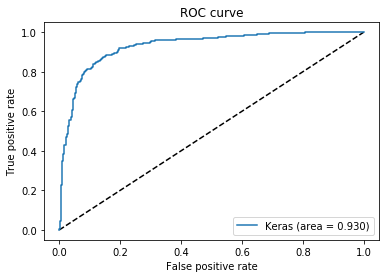

In [24]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [25]:
model.get_config()
predicted_labels = model.predict(data_test)

In [26]:
import deeplift
import json
from deeplift.conversion import kerasapi_conversion

In [27]:
model.save_weights("my_weights.h5")

In [28]:
my_json_string = model.to_json()
jsonData = json.loads(my_json_string)
print jsonData["config"]

[{u'class_name': u'Conv1D', u'config': {u'kernel_initializer': {u'class_name': u'VarianceScaling', u'config': {u'distribution': u'uniform', u'scale': 1.0, u'seed': None, u'mode': u'fan_avg'}}, u'name': u'conv1d_1', u'kernel_constraint': None, u'bias_regularizer': None, u'bias_constraint': None, u'dtype': u'float32', u'activation': u'relu', u'trainable': True, u'data_format': u'channels_last', u'padding': u'valid', u'strides': [1], u'dilation_rate': [1], u'kernel_regularizer': None, u'filters': 30, u'bias_initializer': {u'class_name': u'Zeros', u'config': {}}, u'batch_input_shape': [None, 500, 4], u'use_bias': True, u'activity_regularizer': None, u'kernel_size': [10]}}, {u'class_name': u'MaxPooling1D', u'config': {u'padding': u'valid', u'strides': [1], u'trainable': True, u'name': u'max_pooling1d_1', u'pool_size': [491]}}, {u'class_name': u'Flatten', u'config': {u'trainable': True, u'name': u'flatten_1', u'data_format': u'channels_last'}}, {u'class_name': u'Dense', u'config': {u'kernel_

In [29]:
def convertKerasJSONtoDeepLIFT(kerasJSON_str):
    jsonData = json.loads(kerasJSON_str)
    layersData = jsonData["config"]
    jsonData["config"] = layersData
    return json.dumps(jsonData)

In [30]:
my_json_string = convertKerasJSONtoDeepLIFT(my_json_string)
with open("model.json", "w") as json_file:
    json_file.write(my_json_string)
keras_model_weights = "my_weights.h5"
keras_model_json = "model.json"

In [31]:
with open("model_actual.json", "w") as json_file:
    json_file.write(my_json_string)

In [32]:
from keras.models import model_from_json
keras_model = model_from_json(open(keras_model_json).read())
keras_model.load_weights(keras_model_weights)

In [33]:
from deeplift.layers import NonlinearMxtsMode
import deeplift.conversion.kerasapi_conversion as kc
reload(deeplift.layers)
reload(deeplift.conversion.kerasapi_conversion)
from collections import OrderedDict

In [34]:
method_to_model = OrderedDict()
for method_name, nonlinear_mxts_mode in [
    #The genomics default = rescale on conv layers, revealcance on fully-connected
    ('rescale_conv_revealcancel_fc', NonlinearMxtsMode.DeepLIFT_GenomicsDefault)]:
    method_to_model[method_name] = kc.convert_model_from_saved_files(
        h5_file=keras_model_weights,
        json_file=keras_model_json,
        nonlinear_mxts_mode=nonlinear_mxts_mode)

nonlinear_mxts_mode is set to: DeepLIFT_GenomicsDefault
For layer 0 the preceding linear layer is preact_0 of type Conv1D;
In accordance with nonlinear_mxts_mode=DeepLIFT_GenomicsDefault we are setting the NonlinearMxtsMode to Rescale
Heads-up: current implementation assumes maxpool layer is followed by a linear transformation (conv/dense layer)
For layer 3 the preceding linear layer is preact_3 of type Dense;
In accordance with nonlinear_mxts_modeDeepLIFT_GenomicsDefault we are setting the NonlinearMxtsMode to RevealCancel
Heads-up: I assume sigmoid is the output layer, not an intermediate one; if it's an intermediate layer then please bug me and I will implement the grad func
For layer 4 the preceding linear layer is preact_4 of type Dense;
In accordance with nonlinear_mxts_modeDeepLIFT_GenomicsDefault we are setting the NonlinearMxtsMode to RevealCancel


In [37]:
from deeplift.util import compile_func
model_to_test = method_to_model['rescale_conv_revealcancel_fc']
deeplift_prediction_func = compile_func([model_to_test.get_layers()[0].get_activation_vars()],
                                         model_to_test.get_layers()[-1].get_activation_vars())
original_model_predictions = keras_model.predict(temp_ohe_sequences, batch_size=200)
converted_model_predictions = deeplift.util.run_function_in_batches(
                                input_data_list=[temp_ohe_sequences],
                                func=deeplift_prediction_func,
                                batch_size=200,
                                progress_update=None)
print("maximum difference in predictions:",np.max(np.array(converted_model_predictions)-np.array(original_model_predictions)))
assert np.max(np.array(converted_model_predictions)-np.array(original_model_predictions)) < 10**-5
predictions = converted_model_predictions

('maximum difference in predictions:', 0.0)


In [38]:
print("Compiling scoring functions")
method_to_scoring_func = OrderedDict()
for method,model in method_to_model.items():
    print("Compiling scoring function for: "+method)
    method_to_scoring_func[method] = model.get_target_contribs_func(find_scores_layer_idx=0,
                                                                    target_layer_idx=-2)
    
#To get a function that just gives the gradients, we use the multipliers of the Gradient model
#gradient_func = method_to_model['grad_times_inp'].get_target_multipliers_func(find_scores_layer_idx=0,
#                                                                              target_layer_idx=-2)
#print("Compiling integrated gradients scoring functions")
#integrated_gradients10_func = deeplift.util.get_integrated_gradients_function(
#    gradient_computation_function = gradient_func,
#    num_intervals=10)
#method_to_scoring_func['integrated_gradients10'] = integrated_gradients10_func

Compiling scoring functions
Compiling scoring function for: rescale_conv_revealcancel_fc


In [40]:
background = OrderedDict([('A', 0.25), ('C', 0.25), ('G', 0.25), ('T', 0.25)])

from collections import OrderedDict
method_to_task_to_scores = OrderedDict()
for method_name, score_func in method_to_scoring_func.items():
    print("on method",method_name)
    method_to_task_to_scores[method_name] = OrderedDict()
    for task_idx in [0]:
        scores = np.array(score_func(
                    task_idx=task_idx,
                    input_data_list=[temp_ohe_sequences],
                    input_references_list=[
                     np.array([background['A'],
                               background['C'],
                               background['G'],
                               background['T']])[None,None,:]],
                    batch_size=200,
                    progress_update=None))
        assert scores.shape[2]==4
        #The sum over the ACGT axis in the code below is important! Recall that DeepLIFT
        # assigns contributions based on difference-from-reference; if
        # a position is [1,0,0,0] (i.e. 'A') in the actual sequence and [0.3, 0.2, 0.2, 0.3]
        # in the reference, importance will be assigned to the difference (1-0.3)
        # in the 'A' channel, (0-0.2) in the 'C' channel,
        # (0-0.2) in the G channel, and (0-0.3) in the T channel. You want to take the importance
        # on all four channels and sum them up, so that at visualization-time you can project the
        # total importance over all four channels onto the base that is actually present (i.e. the 'A'). If you
        # don't do this, your visualization will look very confusing as multiple bases will be highlighted at
        # every position and you won't know which base is the one that is actually present in the sequence!
        scores = np.sum(scores, axis=2)
        method_to_task_to_scores[method_name][task_idx] = scores

('on method', 'rescale_conv_revealcancel_fc')


In [42]:
#visualize scores + ground-truth locations of motifs
%matplotlib inline
from deeplift.visualization import viz_sequence

# for task, idx in [(0,731), #illustrates failure of grad*inp, integrated grads, deeplift-rescale
#                   (1,197)  #illustrates non-specific firing of guided backprop
#                  ]:
for task, idx in [(0,1500) #illustrates failure of grad*inp, integrated grads, deeplift-rescale
                          #illustrates non-specific firing of guided backprop
                 ]:
    print("Scores for task",task,"for example",idx)
    for method_name in [
                        'rescale_conv_revealcancel_fc',
                        ]:
        scores = method_to_task_to_scores[method_name][task]
        scores_for_idx = scores[idx]
        original_onehot = temp_ohe_sequences[idx]
        scores_for_idx = original_onehot*scores_for_idx[:,None]
        print(method_name)
#         highlight = {'blue':[
#                 (embedding.startPos, embedding.startPos+len(embedding.what))
#                 for embedding in data.embeddings[idx] if 'GATA_disc1' in embedding.what.getDescription()],
#                 'green':[
#                 (embedding.startPos, embedding.startPos+len(embedding.what))
#                 for embedding in data.embeddings[idx] if 'TAL1_known1' in embedding.what.getDescription()]}
        viz_sequence.plot_weights(scores_for_idx, subticks_frequency=10)   

('Scores for task', 0, 'for example', 1500)


NameError: name 'ohe_sequences' is not defined